In [1]:
from http.server import BaseHTTPRequestHandler, HTTPServer
import json
import cgi

### Introduction:
An HTTP server that is supposed to be run on Raspberry Pi inside the fridge. It simply sends the information of all the items in the fridge whenever it receives a get request. The post method can be implemented in the future to manipulate the items from the APP.

Supports 6 types of items: apple, banana, orange, tomato, broccoli, green pepper.

Other items are not recognizable by our model and do not have corresponding pictures in the APP.
### Explanation of data:
- type: type of item
- in_time: the date that the item is put inside the fridge
- expire_dates: the total number of days that the item would expire
- level: the level of shelf the item is located inside the fridge
- status: 
    + 0: food is fresh
    + 1: food is going bad
    + -1: food is expired
    

### How to run:

1. Replace the variable IP_address with ip address of the Raspberry Pi (whatever the sever is). 
    - To get the ip address of the server, run the command ifconfig in Raspberry Pi or other other Unix-like operating systems, run ipconfig on windows. 
2. Replace the sever ip address in android app with the same ip address
3. If the port number is occupied, change to other port number. The port number here and the port number in the app has to be the same. 

### Example APP result:
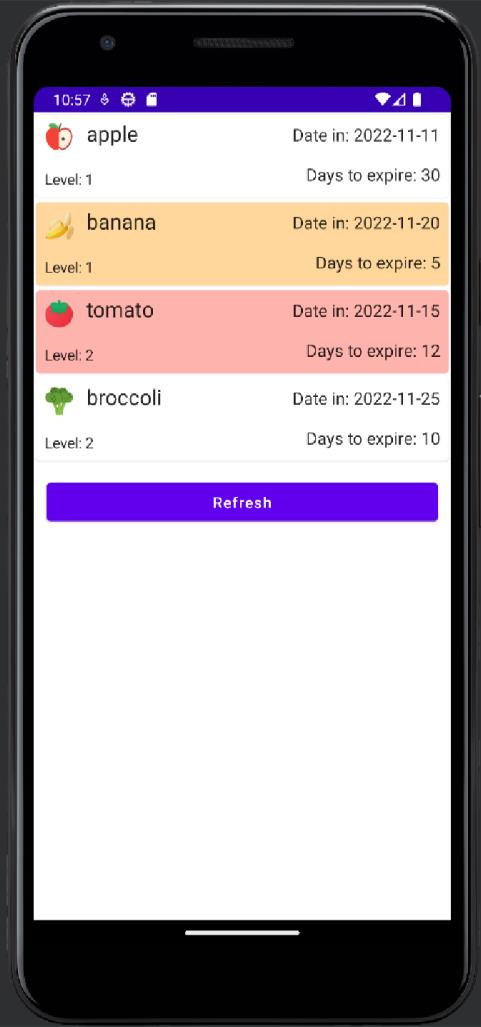

In [2]:
# hardcode list of items
items = [
    {
        "type": "apple",
        "in_time": "2022-11-11",
        "expire_dates": 30,
        "level": 1,
        "status": 1
    },
    {
        "type": "banana",
        "in_time": "2022-11-20",
        "expire_dates": 5,
        "level": 1,
        "status": 0
    },
    {
        "type": "tomato",
        "in_time": "2022-11-15",
        "expire_dates": 12,
        "level": 2,
        "status": -1
    },
    {
        "type": "broccoli",
        "in_time": "2022-11-25",
        "expire_dates": 10,
        "level": 2,
        "status": 1
    },
    {
        "type": "orange",
        "in_time": "2022-11-25",
        "expire_dates": 10,
        "level": 2,
        "status": -1
    },
    {
        "type": "green pepper",
        "in_time": "2022-11-25",
        "expire_dates": 10,
        "level": 2,
        "status": 0
    }
]

In [3]:
class GP(BaseHTTPRequestHandler):
    def _set_headers(self):
        self.send_response(200)
        self.send_header('Content-type', 'text/html')
        self.end_headers()
    def do_HEAD(self):
        self._set_headers()
    def do_GET(self):
        self._set_headers()
        print(self.path)
#         print(json.dumps(self.path[2:]))
        self.wfile.write(bytes(json.dumps(items), encoding='utf-8'))
    def do_POST(self):
        self._set_headers()
        form = cgi.FieldStorage(
            fp=self.rfile,
            headers=self.headers,
            environ={'REQUEST_METHOD': 'POST'}
        )
        print(form.getvalue("foo"))
        print(form.getvalue("bin"))
        self.wfile.write("<html><body><h1>POST Request Received!</h1></body></html>")


In [ ]:
# ip address of the server, use ifconfig or ipconfig command to get ip
IP_address = '192.168.137.1'
port = 8080
httpd = HTTPServer((IP_address, port), GP)
httpd.serve_forever()

192.168.137.1 - - [27/Nov/2022 23:41:53] "GET / HTTP/1.1" 200 -


/


192.168.137.1 - - [27/Nov/2022 23:42:03] "GET / HTTP/1.1" 200 -


/


192.168.137.1 - - [27/Nov/2022 23:42:38] "GET / HTTP/1.1" 200 -


/
